Question 1

Part A

In [1]:
import numpy as np

#the matrix representation of the markov process
mkv_mtx = np.array([[0.2, 0.7, 0.1],
                   [0.2, 0.5, 0.3],
                   [0.2, 0.4, 0.4]])

mkv_mtx

array([[0.2, 0.7, 0.1],
       [0.2, 0.5, 0.3],
       [0.2, 0.4, 0.4]])

Part B

In [5]:
# Initial state
current_state = 1  # Start with X0 = 1

# Number of steps
num_steps = 10  

# Simulate the Markov chain
chain_realization = [current_state]
for i in range(num_steps):
    # Get probabilities for the next state based on the current state
    probabilities = mkv_mtx[current_state - 1]
    
    # Move to the next state based on the probabilities
    next_state = np.random.choice([1, 2, 3], p=probabilities)
    
    # Update the current state
    current_state = next_state
    chain_realization.append(current_state)

print("Simulated Markov chain realization:", chain_realization)

Simulated Markov chain realization: [1, 2, 3, 2, 2, 2, 1, 1, 2, 2, 1]


Question 2

Part A

In [11]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(mkv_mtx.T)

# Find the index of eigenvalue equal to 1 (considering floating-point precision)
index_eigenvalue_1 = np.where(np.isclose(eigenvalues, 1))[0][0]

# Get the corresponding eigenvector(s)
stationary = eigenvectors[:, index_eigenvalue_1]
stationary = stationary/np.sum(stationary)

print("Eigenvector(s) corresponding to eigenvalue 1:")
print(stationary)

Eigenvector(s) corresponding to eigenvalue 1:
[0.2        0.51111111 0.28888889]


Part B

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


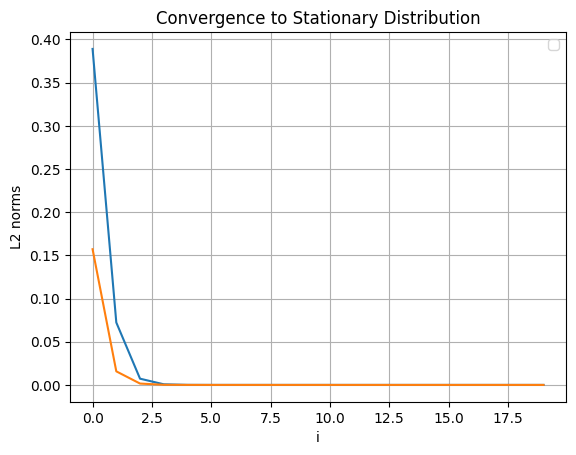

In [15]:
import matplotlib.pyplot as plt

#two different initial states
pi_0_1 = [0.1, 0.3, 0.6]
pi_0_2 = [0.2, 0.4, 0.4]

#num of iteration
n = 20
#the l2 norms of each state
norms_1 = []
norms_2 = []

for i in range(n):
    pi_i_1 = np.dot(pi_0_1, np.linalg.matrix_power(mkv_mtx, i))
    pi_i_2 = np.dot(pi_0_2, np.linalg.matrix_power(mkv_mtx, i))
    norms_1.append(np.linalg.norm(pi_i_1 - stationary))
    norms_2.append(np.linalg.norm(pi_i_2 - stationary))

plt.plot(range(n), norms_1)
plt.plot(range(n), norms_2)
plt.xlabel('i')
plt.ylabel('L2 norms')
plt.title('Convergence to Stationary Distribution')
plt.legend()
plt.grid(True)
plt.show()

Question 3

Part A

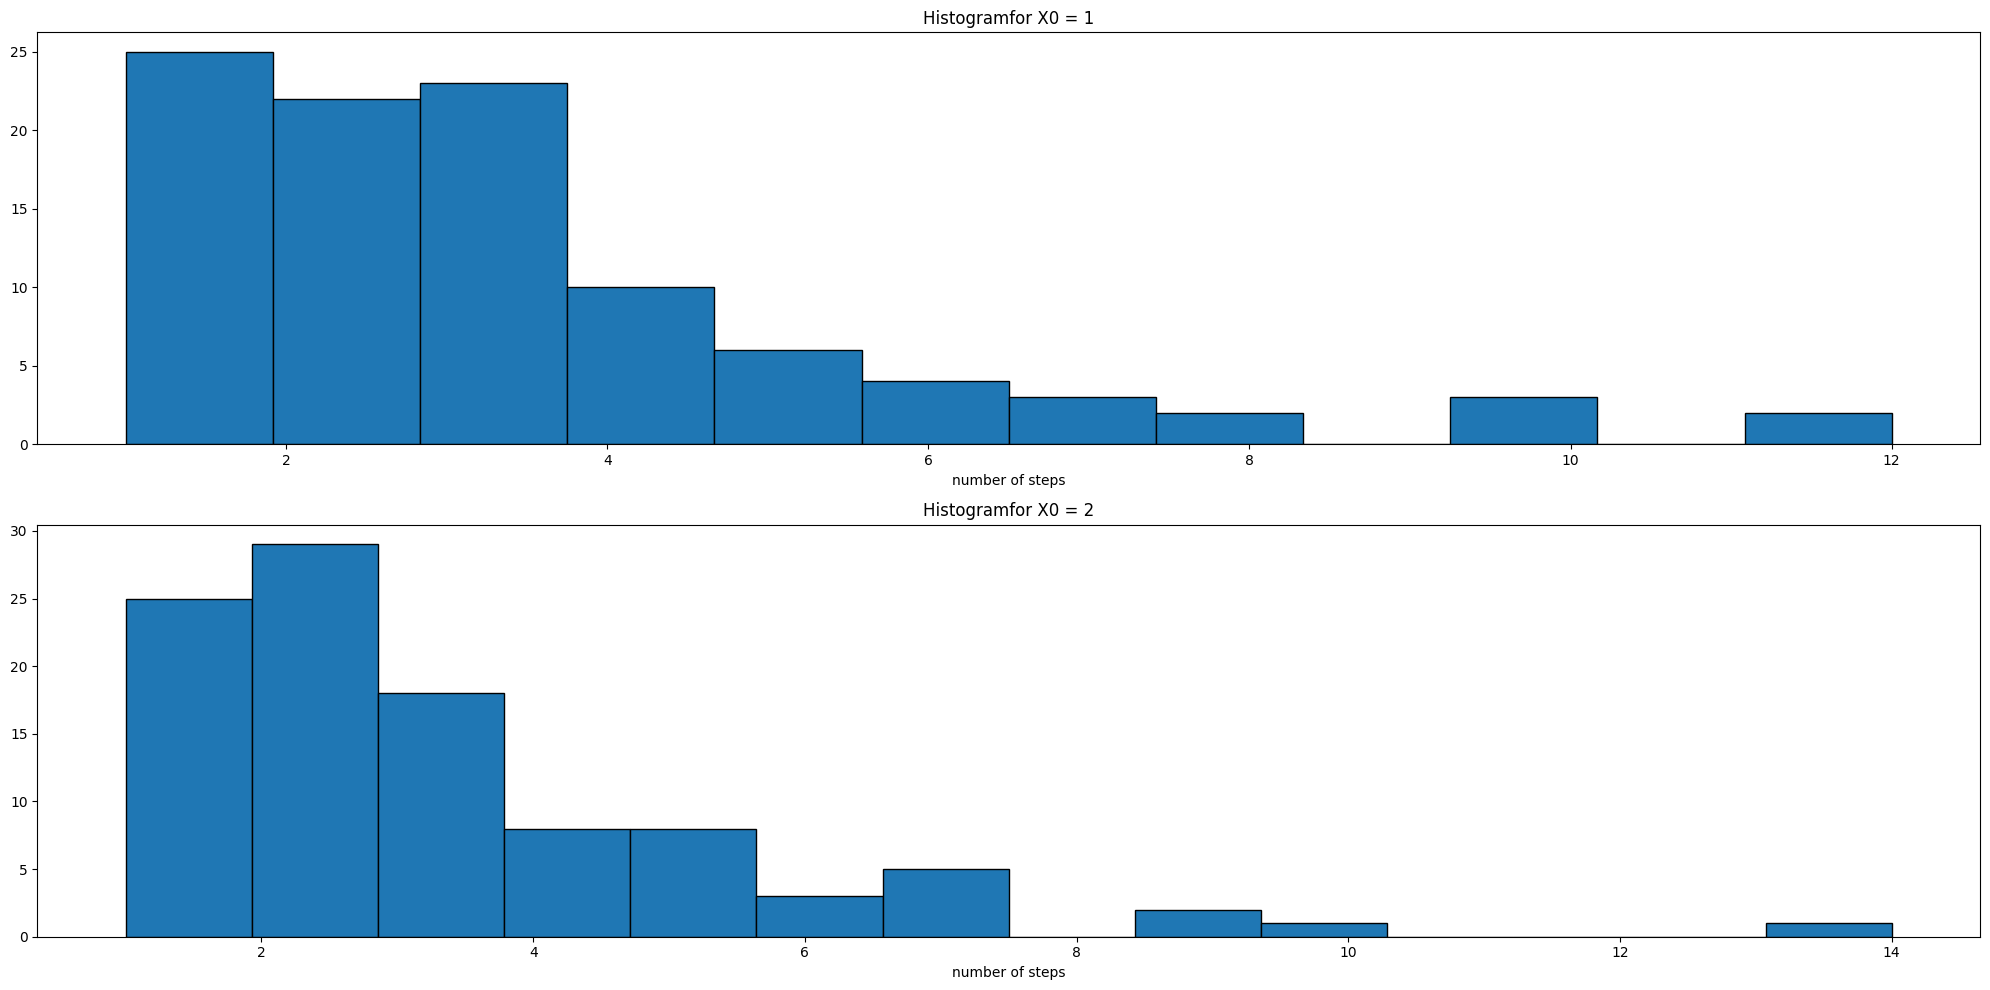

In [22]:
def get_num_steps(x0):
    P = np.array([
        [0.2, 0.7, 0.1],
        [0.2, 0.5, 0.3],
        [0.2, 0.4, 0.4]
    ])
    
    current = x0 - 1 
    num_step = 0

    while current != 2:  
        probabilities = P[current_state]
        next = np.random.choice([0, 1, 2], p=probabilities)
        current = next
        num_step += 1

    return num_step


plt.figure(figsize=(20,10))

n_sim = 100
#arrival times for x0 = 1
t_1 = [get_num_steps(1) for i in range(n_sim)]
#that of for x0 = 2
t_2 = [get_num_steps(2) for i in range(n_sim)]

#do the histogram
plt.subplot(2, 1, 1)
plt.hist(t_1, bins= max(t_1), edgecolor='black')
plt.title('Histogramfor X0 = 1')
plt.xlabel('number of steps')

plt.subplot(2, 1, 2)
plt.hist(t_2, bins= max(t_2), edgecolor='black')
plt.title('Histogramfor X0 = 2')
plt.xlabel('number of steps')

plt.tight_layout()
plt.show()


Part B

Simply solve the following linear equations:\
$\mu_{1} = 1 + 0.1\mu_{1} + 0.7\mu_{2}$\
$\mu_{2} = 1 + 0.2\mu_{1} + 0.5\mu_{2}$\

Which gives the following solution:\
$\mu_{1} = 60/13$\
$\mu_{2} = 50/13$\


